In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:\projects\LARGE Projects\poems_classification\Poem_classification - train_data.csv')
df2 = pd.read_csv('D:\projects\LARGE Projects\poems_classification\Poem_classification - test_data.csv')


In [32]:
df['Genre'].value_counts()

Genre
Music          238
Death          231
Environment    227
Affection      141
Name: count, dtype: int64

In [3]:
df = df.dropna(subset=['Poem'])
df.head(10)

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
6,Music,For Frank X WalkerFXW: I don’t know how to sw...
7,Music,My neighbor to the left had a stroke a couple...
8,Music,—for a sixty-seven-pound nugget of Lake Superi...
9,Music,—Issa Rae Everybody Black is my hometown team....
10,Music,"""Save your hands,” my mother says, seeing me u..."


In [4]:
df.head(10)

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
6,Music,For Frank X WalkerFXW: I don’t know how to sw...
7,Music,My neighbor to the left had a stroke a couple...
8,Music,—for a sixty-seven-pound nugget of Lake Superi...
9,Music,—Issa Rae Everybody Black is my hometown team....
10,Music,"""Save your hands,” my mother says, seeing me u..."


In [5]:
df2.dropna(subset=['Poem'], inplace=True)

In [6]:
df2

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


### TFIDF Encoding

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_features=10000,stop_words='english',min_df=3,max_df=0.3)
vectorizer.fit(df['Poem'])

x = vectorizer.transform(df['Poem'])

feature_names = vectorizer.get_feature_names_out()
print("length of feature_names:",len(feature_names))
print("length of x:",len(x.toarray()))

final_df = pd.DataFrame(x.toarray(), columns = feature_names)

length of feature_names: 1568
length of x: 837


In [111]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_features=10000,stop_words='english',min_df=3,max_df=0.3)
vectorizer.fit(df2['Poem'])

x = vectorizer.transform(df2['Poem'])

feature_names = vectorizer.get_feature_names_out()
print("length of feature_names:",len(feature_names))
print("length of x:",len(x.toarray()))

final_df = pd.DataFrame(x.toarray(), columns = feature_names)

length of feature_names: 247
length of x: 150


In [205]:
feature_names[4]

'ache'

In [206]:
final_df

,2015,40,able,abyss,ache,action,added,address,admit,afraid,...,yard,year,years,yellow,yes,yesterday,yon,yonder,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2659,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.316127,0.0,0.0
835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.210572,0.0,0.0,0.000000,0.0,0.0


In [207]:
#sentence transformers encoding

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
embeddings = model.encode(df['Poem'].tolist(), show_progress_bar=True)

In [20]:
print(len(embeddings))
print(len(embeddings[0]))

837
384


### Train Test SplitZ

In [22]:
from sklearn.model_selection import train_test_split

xtrainem,xtestem,ytrainem,ytestem = train_test_split(embeddings,df['Genre'],test_size=0.2,random_state=42)
xtraintf,xtesttf,ytraintf,ytesttf = train_test_split(x,df['Genre'],test_size=0.2,random_state=42)

### Random forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfem = RandomForestClassifier(n_estimators=100,random_state=42)
rftf = RandomForestClassifier(n_estimators=100,random_state=42)

rfem.fit(xtrainem,ytrainem)
rftf.fit(xtraintf,ytraintf)

ypredrm = rfem.predict(xtestem)
ypredrf = rftf.predict(xtesttf)

print("Accuracy of sentence transformer model:",accuracy_score(ytestem,ypredrm))
print("Accuracy of tfidf model:",accuracy_score(ytesttf,ypredrf))

print("classification report of sentence transformer model:\n",classification_report(ytestem,ypredrm))
print("classification report of tfidf model:\n",classification_report(ytesttf,ypredrf))

Accuracy of sentence transformer model: 0.49404761904761907
Accuracy of tfidf model: 0.4583333333333333
classification report of sentence transformer model:
               precision    recall  f1-score   support

   Affection       0.47      0.32      0.38        22
       Death       0.41      0.42      0.42        45
 Environment       0.63      0.69      0.65        54
       Music       0.42      0.43      0.42        47

    accuracy                           0.49       168
   macro avg       0.48      0.46      0.47       168
weighted avg       0.49      0.49      0.49       168

classification report of tfidf model:
               precision    recall  f1-score   support

   Affection       0.35      0.27      0.31        22
       Death       0.51      0.44      0.48        45
 Environment       0.58      0.56      0.57        54
       Music       0.35      0.45      0.39        47

    accuracy                           0.46       168
   macro avg       0.45      0.43      0.4

### Logistic Regression model

In [32]:
from sklearn.linear_model import LogisticRegression

lrem = LogisticRegression(max_iter=1000,random_state=42)
lrtf = LogisticRegression(max_iter=1000,random_state=42)

lrem.fit(xtrainem,ytrainem)
lrtf.fit(xtraintf,ytraintf)

ypredlm = lrem.predict(xtestem)
ypredlf = lrtf.predict(xtesttf)

print("Accuracy of sentence transformer model:",accuracy_score(ytestem,ypredlm))
print("Accuracy of tfidf model:",accuracy_score(ytesttf,ypredlf))

print("classification report of sentence transformer model:\n",classification_report(ytestem,ypredlm))
print("classification report of tfidf model:\n",classification_report(ytesttf,ypredlf))



Accuracy of sentence transformer model: 0.6130952380952381
Accuracy of tfidf model: 0.44642857142857145
classification report of sentence transformer model:
               precision    recall  f1-score   support

   Affection       0.39      0.50      0.44        22
       Death       0.71      0.53      0.61        45
 Environment       0.66      0.72      0.69        54
       Music       0.62      0.62      0.62        47

    accuracy                           0.61       168
   macro avg       0.59      0.59      0.59       168
weighted avg       0.63      0.61      0.61       168

classification report of tfidf model:
               precision    recall  f1-score   support

   Affection       0.17      0.09      0.12        22
       Death       0.41      0.40      0.40        45
 Environment       0.57      0.59      0.58        54
       Music       0.41      0.49      0.45        47

    accuracy                           0.45       168
   macro avg       0.39      0.39      0.3

### K-Means Try

In [9]:
final_df.T.nlargest(5,0)

,0,1,2,3,4,5,6,7,8,9,...,827,828,829,830,831,832,833,834,835,836
spend,0.556819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
trickle,0.537236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
mountain,0.429836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
water,0.346378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.150167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393311
day,0.310794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [10]:
# Data Structures
import numpy  as np
import pandas as pd

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [11]:
#K means training

In [12]:
def run_Kmeans(max_k,data):
    max_k+=1
    kmeans_result = dict()
    for k in range(2,max_k):
        kmeans = cluster.KMeans(
            n_clusters=k,
            init="k-means++", #defines the initial cluster centers.
            n_init=50,
            tol = 0.0001,#distance from all samples to centroid should be larger than tol(tolerence)
            random_state=1,#give reproducable results
            algorithm="full"
        )

        kmeans_result.update({k:kmeans.fit(data)})
    return kmeans_result

In [13]:
#silhoutte score

In [14]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(),reverse=True):
        print(f"Average Silhouette Score for {avg_dict[avg]} clusters: {avg}")

def plotSilhouette(df,n_clusters,kmeans_labels,silhouette_avg):
    fig,ax1 = plt.subplots(1)
    fig.set_size_inches(8,6)
    ax1.set_xlim([-0.2,1])
    ax1.set_ylim([0,len(df)+(n_clusters+1)*10])

    ax1.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title(f"Silhouette Analysis for {n_clusters} Clusters")

    y_lower = 10
    sample_silhouette_values = silhouette_samples(df,kmeans_labels) #calculates the silohutte score for each cluster

    for i in range(n_clusters):
        ith_cluster = sample_silhouette_values[kmeans_labels==i] #extract s score of a particular cluster
        ith_cluster.sort()

        size_cluster_i = ith_cluster.shape[0] #number of elemts in that cluster
        y_upper = y_lower + size_cluster_i #height of the plot

        color = cm.nipy_spectral(float(i)/n_clusters) #color of the plot
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster,facecolor=color,edgecolor=color,alpha=0.7) #fill the plot with color

        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) #label the plot with cluster number
        y_lower = y_upper+10 #update the height of the plot
    plt.show()

def silhouette(kmeans_dict,df,plot=False):
    df = df.to_numpy()
    avg_silhouette = dict()

    for n_clusters,kmeans in kmeans_dict.items():
        kmeans_labels = kmeans.predict(df)
        print(f"{n_clusters} kmeans labels:",kmeans_labels)
        silhouette_avg = silhouette_score(df,kmeans_labels)
        avg_silhouette.update({silhouette_avg:n_clusters})

        if plot:
            plotSilhouette(df,n_clusters,kmeans_labels,silhouette_avg)
    printAvg(avg_silhouette)


In [15]:
k = 8
kmeans_result = run_Kmeans(k,final_df)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 

In [16]:
kmeans_result

{2: KMeans(algorithm='full', n_clusters=2, n_init=50, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, n_init=50, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, n_init=50, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, n_init=50, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, n_init=50, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, n_init=50, random_state=1),
 8: KMeans(algorithm='full', n_init=50, random_state=1)}

In [17]:
silhouette(kmeans_result,final_df)

2 kmeans labels: [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 1 0 0

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python3

In [18]:
#common words visualizartion

In [19]:
category_list = df['Genre'].to_numpy()
print(len(category_list))
print(category_list[0:5])


837
['Music' 'Music' 'Music' 'Music' 'Music']


In [77]:
from collections import Counter

def plotWords(label,df,n_feats):
    plt.figure(figsize=(8, 6))
    plt.title(f"Most Common Words in Cluster {label}")
    sns.barplot(x = 'score' , y = 'features' , data = df[:n_feats])
    plt.show()

def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def plotWordCloud(centroid_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white")
    wordcloud.generate_from_frequencies(centroid_dict)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def get_top_features_cluster(kmeansAlgo,tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        print("Lable:",label)
        id_temp = np.where(prediction==label) # indices for each cluster
        cate=category_list[id_temp[0]]
        value_counts = Counter(cate)
        print(value_counts)
        cluster_name = value_counts.most_common(1)[0][0]
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = feature_names
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
        print("\nCluster {}:".format(cluster_name))
        print(tf_idf_array[id_temp])
        print(df.head(10))
        print("id_temp:",id_temp)
        print("x_means",x_means)
        print("SORTED MEANS:",sorted_means)
        print("features:",features)
        print("best features:",best_features)
        plotWords(cluster_name,df,n_feats)
        centroid = pd.DataFrame(kmeansAlgo.cluster_centers_)
        centroid.columns = final_df.columns
        centroid_dict = centroidsDict(centroid, int(label))
        plotWordCloud(centroid_dict, f"Cluster {cluster_name}")
    return dfs



Lable: 0
Counter({'Death': 125, 'Music': 117, 'Environment': 114, 'Affection': 55})

Cluster Death:
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.3161274 0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
  features     score
0      day  0.016896
1     life  0.013975
2   things  0.013971
3    death  0.013827
4     said  0.013572
5    heart  0.013473
6    white  0.013360
7     long  0.012762
8      air  0.012487
9     make  0.012369
id_temp: (array([  0,   1,   7,  10,  11,  12,  17,  19,  25,  27,  28,  29,  31,
        34,  35,  38,  41,  47,  49,  51,  52,  55,  56,  58,  59,  61,
        64,  65,  66,  67,  68,  70,  72,  73,  75,  77,  79,  80,  82,
        86,  94,  97,  99, 102, 103

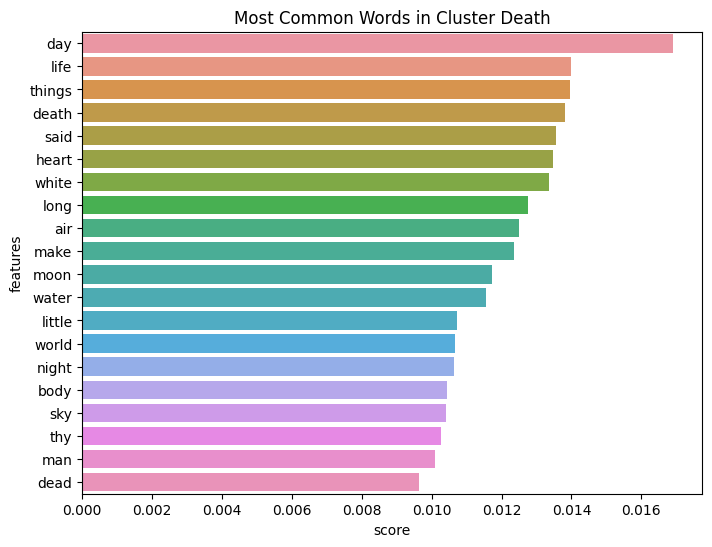

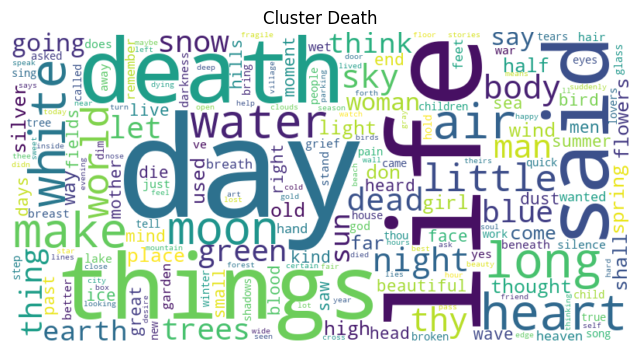

Lable: 1
Counter({'Environment': 64, 'Music': 47, 'Death': 40, 'Affection': 21})

Cluster Environment:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  features     score
0     like  0.095524
1     dark  0.038827
2      red  0.035569
3     rain  0.026147
4    grass  0.025879
5    field  0.023078
6     come  0.021811
7     wind  0.021316
8    white  0.020929
9    green  0.018706
id_temp: (array([ 13,  14,  15,  20,  23,  40,  44,  48,  50,  53,  60,  62,  63,
        76,  81,  83,  84,  90,  96, 100, 101, 106, 107, 109, 111, 113,
       116, 117, 133, 141, 149, 158, 161, 165, 171, 173, 181, 187, 194,
       196, 198, 209, 210, 217, 223, 228, 231, 238, 249, 251, 253, 254,
       255, 257, 258, 263, 267, 269, 279, 280, 282, 290, 291, 295, 296,
       301, 302, 317, 322, 326, 327, 329, 343, 344, 362, 364, 366, 391,
       400, 411, 426, 430, 432, 434, 444, 447, 458, 474, 478, 483, 4

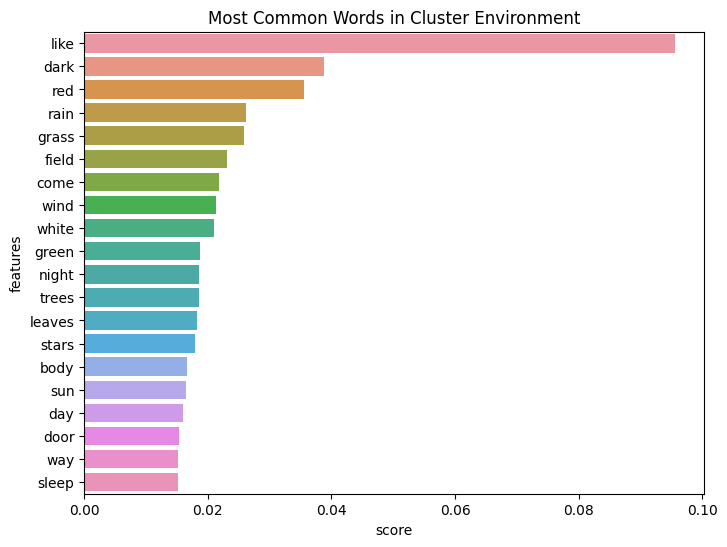

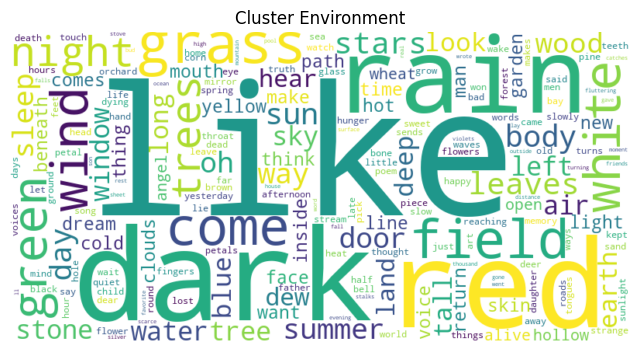

Lable: 2
Counter({'Music': 49, 'Death': 48, 'Affection': 28, 'Environment': 28})

Cluster Music:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.19156985 0.        ]
 [0.         0.         0.         ... 0.         0.29300864 0.        ]]
  features     score
0     time  0.055107
1      did  0.053250
2     know  0.043016
3  morning  0.035077
4    night  0.032607
5   mother  0.029827
6    years  0.026350
7    young  0.023103
8      joy  0.022780
9     room  0.020983
id_temp: (array([  2,   3,   4,   6,   9,  16,  18,  21,  22,  24,  30,  32,  36,
        37,  45,  46,  57,  78,  89,  91,  93,  95,  98, 108, 112, 120,
       123, 128, 135, 140, 148, 150, 151, 153, 155, 168, 170, 172, 188,
  

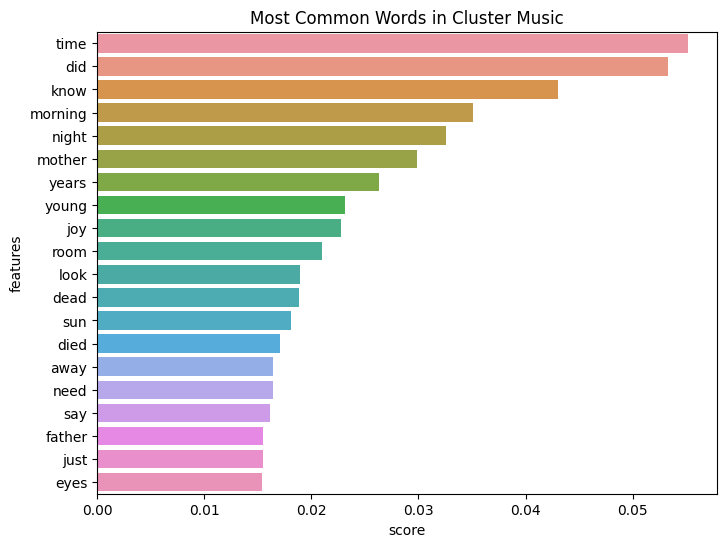

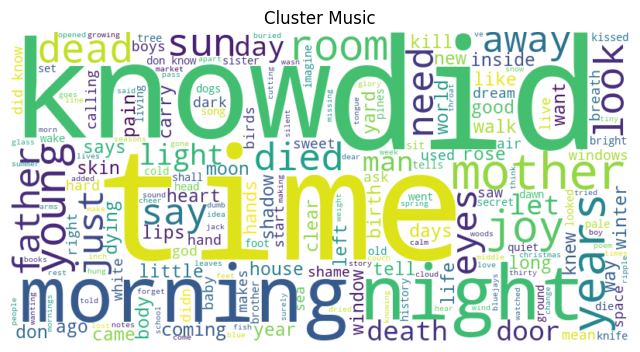

Lable: 3
Counter({'Affection': 37, 'Music': 25, 'Environment': 21, 'Death': 18})

Cluster Affection:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  features     score
0     love  0.132237
1    black  0.064766
2    river  0.056830
3     moon  0.028567
4     like  0.026076
5    heart  0.023668
6     blue  0.023662
7      let  0.019999
8     bark  0.019476
9     life  0.017936
id_temp: (array([  5,   8,  26,  33,  39,  42,  43,  54,  69,  71,  74,  85,  87,
        88,  92, 119, 122, 124, 125, 134, 139, 145, 208, 225, 233, 271,
       276, 277, 283, 285, 292, 308, 316, 371, 374, 378, 383, 387, 402,
       424, 427, 450, 457, 470, 473, 480, 481, 482, 491, 493, 495, 496,
       497, 498, 500, 506, 512, 513, 516, 517, 525, 536, 541, 547, 549,
       550, 551, 555, 562, 565, 566, 569, 574, 582, 593, 597, 599, 607,
       608, 609, 619, 628, 644, 648, 651, 654, 670, 678, 685, 686, 692

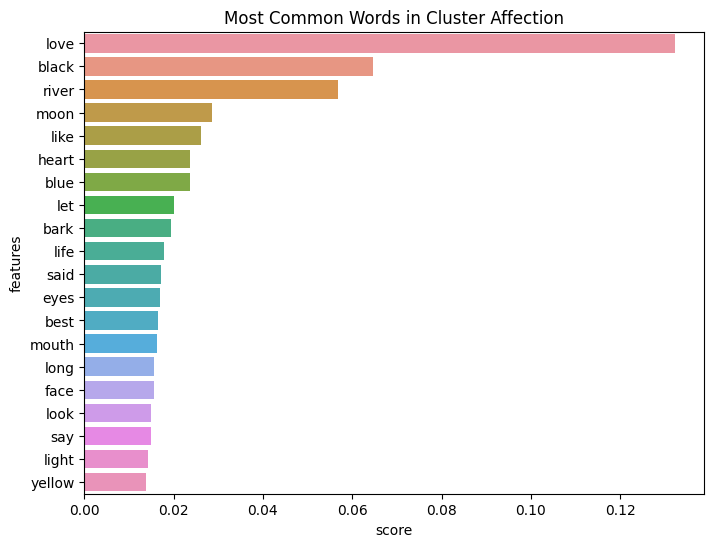

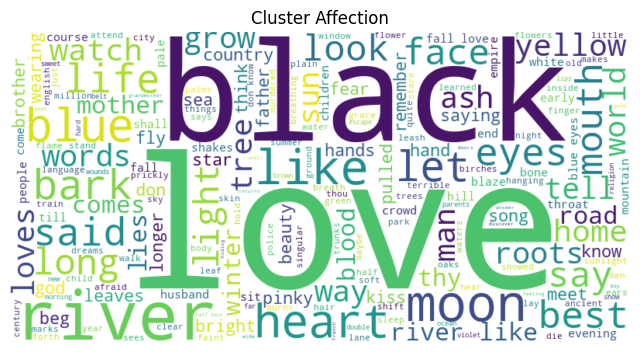

In [78]:
best_result = 4
kmeans = kmeans_result[best_result]

final_df_arr = final_df.to_numpy()
prediction = kmeans.predict(final_df)
# print(prediction)
# print(len(prediction))
# print(len(final_df_arr))
# temp = np.where(prediction==4)
# print(len(temp[0]))
# print("temp:",temp)
# print(len(final_df_arr[temp]))
# print(len(np.mean(final_df_arr[temp],axis=0)))
# print(np.mean(final_df_arr[temp],axis=0))
# print(res:=np.argsort(mean:=np.mean(final_df_arr[temp],axis=0))[::-1][:20])
n_feats = 20
#print(mean[res])
dfs = get_top_features_cluster(kmeans,final_df_arr,prediction,n_feats)

In [49]:
kmeans.cluster_centers_

array([[9.44386584e-04, 1.04566794e-03, 1.15989446e-03, ...,
        1.73789808e-03, 1.25031772e-03, 7.02589733e-04],
       [2.47231906e-03, 6.50521303e-19, 4.33680869e-19, ...,
        1.08420217e-18, 1.73472348e-18, 4.04401113e-03],
       [3.51012646e-03, 3.75656289e-03, 3.91619719e-03, ...,
        8.67361738e-19, 2.31026133e-02, 4.33680869e-19],
       [2.16840434e-19, 0.00000000e+00, 4.33680869e-19, ...,
        2.46645040e-03, 3.57799081e-03, 3.87963142e-03]])

In [50]:
final_df.columns

Index(['2015', '40', 'able', 'abyss', 'ache', 'action', 'added', 'address',
       'admit', 'afraid',
       ...
       'yard', 'year', 'years', 'yellow', 'yes', 'yesterday', 'yon', 'yonder',
       'young', 'youth'],
      dtype='object', length=1568)

In [47]:
#map of words

In [51]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [70]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns

a = centroids.T[0].sort_values(ascending = False).reset_index().values
a[1]
print(centroidsDict(centroids, 0))

{'day': 0.016896198534372932, 'life': 0.013975329844375713, 'things': 0.013970768205890233, 'death': 0.01382668707400381, 'said': 0.013571613095063833, 'heart': 0.013472983582396628, 'white': 0.013360446913436035, 'long': 0.01276182995471213, 'air': 0.01248670048051088, 'make': 0.012368541259537992, 'moon': 0.011716069347489224, 'water': 0.011561540775882326, 'little': 0.01073829153490574, 'world': 0.010679240551336773, 'night': 0.010639061100144988, 'body': 0.010446494421100749, 'sky': 0.010417253302291004, 'thy': 0.010269313996221378, 'man': 0.010109711952652239, 'dead': 0.009640490657414518, 'green': 0.009530709851481137, 'trees': 0.009346541818416784, 'thing': 0.009304015481579574, 'blue': 0.009197284285549787, 'snow': 0.00918210979877446, 'let': 0.00910427128874069, 'earth': 0.009081882368605956, 'sun': 0.008973183603207278, 'think': 0.008773747517300621, 'going': 0.008753041111916285, 'say': 0.00866797734003213, 'woman': 0.00852116464998295, 'thought': 0.008296144651373847, 'plac

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)